# Import the Data

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth',100)
import requests

In [ ]:
data = pd.read_csv("D:\\DS Project 2(sentimental analysis)\\final_sent.csv")

In [ ]:
data.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

                                                               Reviews  
0                                         Impeccable quality standards  
1                                                    Very Good Product  
2  touch is great, phone response time is superb due to underlying ...  
3                                    Buy, if your Budget is below 13K.  
4                                                     Poor performance

# Exploratory Data Analysis

### Delete the unnamed :0 column

In [ ]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

Reviews
0                                         Impeccable quality standards
1                                                    Very Good Product
2  touch is great, phone response time is superb due to underlying ...
3                                    Buy, if your Budget is below 13K.
4                                                     Poor performance

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  15880 non-null  object
dtypes: object(1)
memory usage: 124.2+ KB


In [ ]:
data.shape

(15880, 1)

In [ ]:
data.isnull().sum()

Reviews    0
dtype: int64

In [ ]:
data.dropna()

Reviews
0                                                                             Impeccable quality standards
1                                                                                        Very Good Product
2                                      touch is great, phone response time is superb due to underlying ...
3                                                                        Buy, if your Budget is below 13K.
4                                                                                         Poor performance
...                                                                                                    ...
15875  I bought it in Aug and within a month it has stopped working. This is the worst product I have e...
15876                                                                                          I loved it👍
15877  very good phone and  i am loving it... its the best..better than any phone of samsung...its reco...
15878  I liked 4s better than 5/5s. I had all 3 and preferred 4s because it's compact and has everythin...
15879  If you're looking for high speed 4G/LTE feature then 4S doesn't have it being a 30+K price phone...

[15880 rows x 1 columns]

In [ ]:
data.shape

(15880, 1)

### Word Count

In [ ]:
data['word_counts'] = data['Reviews'].apply(lambda x: len(str(x).split()))
data.head()

Reviews  \
0                                         Impeccable quality standards   
1                                                    Very Good Product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    Buy, if your Budget is below 13K.   
4                                                     Poor performance   

   word_counts  
0            3  
1            3  
2           12  
3            7  
4            2

### Characters Count

In [ ]:
data['char_counts'] = data['Reviews'].apply(lambda x: len(str(x)))
data.head()

Reviews  \
0                                         Impeccable quality standards   
1                                                    Very Good Product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    Buy, if your Budget is below 13K.   
4                                                     Poor performance   

   word_counts  char_counts  
0            3           28  
1            3           17  
2           12           67  
3            7           33  
4            2           16

### Stopwords Count

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
data['stopword_count'] = data['Reviews'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop_words]))
data.head()

Reviews  \
0                                         Impeccable quality standards   
1                                                    Very Good Product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    Buy, if your Budget is below 13K.   
4                                                     Poor performance   

   word_counts  char_counts  stopword_count  
0            3           28               0  
1            3           17               1  
2           12           67               3  
3            7           33               4  
4            2           16               0

#  Cleaning  or Text Preprocessing

### Converting all data in lower case

In [ ]:
data['Lowercase'] = data['Reviews'].apply(lambda x: " ".join(word.lower() for word in str(x).split()))
data.head()

Reviews  \
0                                         Impeccable quality standards   
1                                                    Very Good Product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    Buy, if your Budget is below 13K.   
4                                                     Poor performance   

   word_counts  char_counts  stopword_count  \
0            3           28               0   
1            3           17               1   
2           12           67               3   
3            7           33               4   
4            2           16               0   

                                                             Lowercase  
0                                         impeccable quality standards  
1                                                    very good product  
2  touch is great, phone response time is superb due to underlying ...  
3                                    buy, if your budget is below 13k.  
4                                                     poor performance

### Define a function to clean the text

In [ ]:
import re 
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z0-9_]+', ' ', str(text))
    text = re.sub('#',' ',str(text))
    text = re.sub('https?:/\/\[A-Za-z0-9\.\/]+',' ',str(text))
    return text

# Cleaning the text in the review column
data['Punctuation'] = data['Lowercase'].apply(clean)
data.head(50)

Reviews  \
0                                                                          Impeccable quality standards   
1                                                                                     Very Good Product   
2                                   touch is great, phone response time is superb due to underlying ...   
3                                                                     Buy, if your Budget is below 13K.   
4                                                                                      Poor performance   
5                                                                               Awasome Applesome!!!!!!   
6                                                                                             Awesome !   
7   Only battery issue and normally heat when charging , other all function is to goood.  I using 6 ...   
8                                                                           A Best Gift for oldies.....   
9                                            venkatapathiraj 's review for Apple iPhone 4S (White, 8GB)   
10                                                                overall it is good in the price range   
11                                                      Amazon will be happy with the customers like me   
12                                                                              Close your eyes and buy   
13                                                                   Replacement the same 4s White 8 GB   
14                                                       Defective item ( one side speaker not working)   
15                                                                                           Good Phone   
16                                                 One and a half year and having issues with voice ...   
17                                                                             world best apple product   
18                                                                                                   Ok   
19                                                                                       iPhone=quality   
20                                                                         Fantastic device feel for it   
21                                                        somehow I prefer my Lumia phone. I can do ...   
22                                                                                        Awesome Phone   
23                                                                                8gb not enough memory   
24                                                                                  Simple and majestic   
25                                                                  Feels like it is a paper weight now   
26                                                                   but now I'm happy that I bought it   
27                                                                 Faulty Phone with some many defects.   
28                                                                                           Four Stars   
29                                                                                      terrific phone.   
30                                                                          super price & fast delivery   
31                                                                                 The best iPhone ever   
32                                             1) The iphone supplied is required to charge twice a ...   
33                                                                                        Smooth Deal !   
34                                                                                     Awesome product,   
35                                                                                        Not satisfied   
36                                                                                         Good product   
37                            

### Remove Stopwords from data

In [ ]:
data['Stopwords'] = data['Punctuation'].apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))

In [ ]:
data.head()

Reviews  \
0                                         Impeccable quality standards   
1                                                    Very Good Product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    Buy, if your Budget is below 13K.   
4                                                     Poor performance   

   word_counts  char_counts  stopword_count  \
0            3           28               0   
1            3           17               1   
2           12           67               3   
3            7           33               4   
4            2           16               0   

                                                             Lowercase  \
0                                         impeccable quality standards   
1                                                    very good product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    buy, if your budget is below 13k.   
4                                                     poor performance   

                                                       Punctuation  \
0                                     impeccable quality standards   
1                                                very good product   
2  touch is great phone response time is superb due to underlying    
3                                 buy if your budget is below 13k    
4                                                 poor performance   

                                               Stopwords  
0                           impeccable quality standards  
1                                           good product  
2  touch great phone response time superb due underlying  
3                                         buy budget 13k  
4                                       poor performance

### Lemmatization

In [ ]:
# Import Textblob
from textblob import Word

In [ ]:
data['Lammatized'] = data['Stopwords'].apply(lambda x: " ".join(Word(word).lemmatize() for word in str(x).split()))
data.head()

Reviews  \
0                                         Impeccable quality standards   
1                                                    Very Good Product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    Buy, if your Budget is below 13K.   
4                                                     Poor performance   

   word_counts  char_counts  stopword_count  \
0            3           28               0   
1            3           17               1   
2           12           67               3   
3            7           33               4   
4            2           16               0   

                                                             Lowercase  \
0                                         impeccable quality standards   
1                                                    very good product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    buy, if your budget is below 13k.   
4                                                     poor performance   

                                                       Punctuation  \
0                                     impeccable quality standards   
1                                                very good product   
2  touch is great phone response time is superb due to underlying    
3                                 buy if your budget is below 13k    
4                                                 poor performance   

                                               Stopwords  \
0                           impeccable quality standards   
1                                           good product   
2  touch great phone response time superb due underlying   
3                                         buy budget 13k   
4                                       poor performance   

                                              Lammatized  
0                            impeccable quality standard  
1                                           good product  
2  touch great phone response time superb due underlying  
3                                         buy budget 13k  
4                                       poor performance

# Sentiment Analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity<0:
        sentiment_label = "Negative"
    elif sentiment_polarity>0:
        sentiment_label = "Positive"
    else:
        sentiment_label = "Neutral"
        
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [ ]:
# Check function work or not
chk = data['Lammatized'].iloc[0]

In [ ]:
get_sentiment(chk)

{'polarity': 0.375, 'subjectivity': 0.375, 'sentiment': 'Positive'}

In [ ]:
data['Sentiment_Result'] = data['Lammatized'].apply(get_sentiment)
data.head()

Reviews  \
0                                         Impeccable quality standards   
1                                                    Very Good Product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    Buy, if your Budget is below 13K.   
4                                                     Poor performance   

   word_counts  char_counts  stopword_count  \
0            3           28               0   
1            3           17               1   
2           12           67               3   
3            7           33               4   
4            2           16               0   

                                                             Lowercase  \
0                                         impeccable quality standards   
1                                                    very good product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    buy, if your budget is below 13k.   
4                                                     poor performance   

                                                       Punctuation  \
0                                     impeccable quality standards   
1                                                very good product   
2  touch is great phone response time is superb due to underlying    
3                                 buy if your budget is below 13k    
4                                                 poor performance   

                                               Stopwords  \
0                           impeccable quality standards   
1                                           good product   
2  touch great phone response time superb due underlying   
3                                         buy budget 13k   
4                                       poor performance   

                                              Lammatized  \
0                            impeccable quality standard   
1                                           good product   
2  touch great phone response time superb due underlying   
3                                         buy budget 13k   
4                                       poor performance   

                                                                                Sentiment_Result  
0                            {'polarity': 0.375, 'subjectivity': 0.375, 'sentiment': 'Positive'}  
1                 {'polarity': 0.7, 'subjectivity': 0.6000000000000001, 'sentiment': 'Positive'}  
2  {'polarity': 0.5583333333333333, 'subjectivity': 0.7083333333333334, 'sentiment': 'Positive'}  
3                                 {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}  
4                               {'polarity': -0.4, 'subjectivity': 0.6, 'sentiment': 'Negative'}

In [ ]:
data['Sentiment_Result']

0                                  {'polarity': 0.375, 'subjectivity': 0.375, 'sentiment': 'Positive'}
1                       {'polarity': 0.7, 'subjectivity': 0.6000000000000001, 'sentiment': 'Positive'}
2        {'polarity': 0.5583333333333333, 'subjectivity': 0.7083333333333334, 'sentiment': 'Positive'}
3                                       {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}
4                                     {'polarity': -0.4, 'subjectivity': 0.6, 'sentiment': 'Negative'}
                                                     ...                                              
15875                                 {'polarity': -1.0, 'subjectivity': 1.0, 'sentiment': 'Negative'}
15876                                  {'polarity': 0.7, 'subjectivity': 0.8, 'sentiment': 'Positive'}
15877                               {'polarity': 0.7, 'subjectivity': 0.5875, 'sentiment': 'Positive'}
15878    {'polarity': 0.3666666666666667, 'subjectivity': 0.5444444444444

In [ ]:
# Split the Sentiment_Result column in three different column
pd.json_normalize(data['Sentiment_Result'])

polarity  subjectivity sentiment
0      0.375000      0.375000  Positive
1      0.700000      0.600000  Positive
2      0.558333      0.708333  Positive
3      0.000000      0.000000   Neutral
4     -0.400000      0.600000  Negative
...         ...           ...       ...
15875 -1.000000      1.000000  Negative
15876  0.700000      0.800000  Positive
15877  0.700000      0.587500  Positive
15878  0.366667      0.544444  Positive
15879  0.080000      0.520000  Positive

[15880 rows x 3 columns]

In [ ]:
# Join these column to our dataset
data = data.join(pd.json_normalize(data['Sentiment_Result']))
data.head()

Reviews  \
0                                         Impeccable quality standards   
1                                                    Very Good Product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    Buy, if your Budget is below 13K.   
4                                                     Poor performance   

   word_counts  char_counts  stopword_count  \
0            3           28               0   
1            3           17               1   
2           12           67               3   
3            7           33               4   
4            2           16               0   

                                                             Lowercase  \
0                                         impeccable quality standards   
1                                                    very good product   
2  touch is great, phone response time is superb due to underlying ...   
3                                    buy, if your budget is below 13k.   
4                                                     poor performance   

                                                       Punctuation  \
0                                     impeccable quality standards   
1                                                very good product   
2  touch is great phone response time is superb due to underlying    
3                                 buy if your budget is below 13k    
4                                                 poor performance   

                                               Stopwords  \
0                           impeccable quality standards   
1                                           good product   
2  touch great phone response time superb due underlying   
3                                         buy budget 13k   
4                                       poor performance   

                                              Lammatized  \
0                            impeccable quality standard   
1                                           good product   
2  touch great phone response time superb due underlying   
3                                         buy budget 13k   
4                                       poor performance   

                                                                                Sentiment_Result  \
0                            {'polarity': 0.375, 'subjectivity': 0.375, 'sentiment': 'Positive'}   
1                 {'polarity': 0.7, 'subjectivity': 0.6000000000000001, 'sentiment': 'Positive'}   
2  {'polarity': 0.5583333333333333, 'subjectivity': 0.7083333333333334, 'sentiment': 'Positive'}   
3                                 {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}   
4                               {'polarity': -0.4, 'subjectivity': 0.6, 'sentiment': 'Negative'}   

   polarity  subjectivity sentiment  
0  0.375000      0.375000  Positive  
1  0.700000      0.600000  Positive  
2  0.558333      0.708333  Positive  
3  0.000000      0.000000   Neutral  
4 -0.400000      0.600000  Negative

In [ ]:
data['sentiment'].value_counts()

Positive    11377
Neutral      2594
Negative     1909
Name: sentiment, dtype: int64

# Exploratory Data Analysis

In [ ]:
# Import required liabraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline
from PIL import Image

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

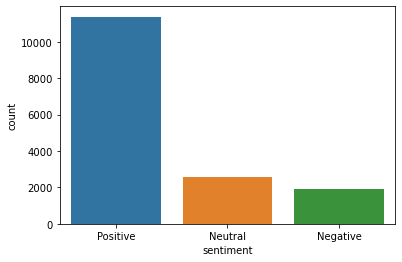

In [ ]:
sns.countplot(data['sentiment'])

### Checking for percentage of every sentiment

In [ ]:
positive = data[data['sentiment']=='Positive']['Lammatized']
print(str(positive.shape[0]/(data.shape[0])*100)+ "% of Positive Review")
pos = positive.shape[0]/(data.shape[0])*100

neutral = data[data['sentiment']=='Neutral']['Lammatized']
print(str(neutral.shape[0]/(data.shape[0])*100)+ "% of Neutral Review")
neu = neutral.shape[0]/(data.shape[0])*100

negative = data[data['sentiment']=='Negative']['Lammatized']
print(str(negative.shape[0]/(data.shape[0])*100)+ "% of Negative Review")
neg = negative.shape[0]/(data.shape[0])*100

71.64357682619648% of Positive Review
16.33501259445844% of Neutral Review
12.021410579345087% of Negative Review


In [ ]:
positive

0                                                                                impeccable quality standard
1                                                                                               good product
2                                                      touch great phone response time superb due underlying
6                                                                                                    awesome
7                         battery issue normally heat charging function goood using 6 month run fastly phone
                                                        ...                                                 
15874    excellent product apple model beat beast including model apple till lag much user friendly even ...
15876                                                                                                  loved
15877                                   good phone loving best better phone samsung recommended everyone use
15878     liked 4 b

In [ ]:
negative

4                                                                                           poor performance
16                                                                                 one half year issue voice
48                                                                                                  pathetic
51                                                             horrible product quite sad see amazon selling
76                                                                                               bad quality
                                                        ...                                                 
15845                                                                       bought son said software missing
15862                                                       complaint phone wont turn touch screen wont work
15868    piece got worst piece refurbished lot feature working properly returned phone return process lon...
15870    bought app

In [ ]:
neutral

3                                                                                             buy budget 13k
5                                                                                          awasome applesome
9                                                            venkatapathiraj review apple iphone 4 white 8gb
12                                                                                             close eye buy
13                                                                                  replacement 4 white 8 gb
                                                        ...                                                 
15861    problem phone day got first open network stated still ongoing problem sound one talking back usi...
15863                                                                     phone unlocked stated pay unlocked
15865    made several attempt contact supplier amazon regarding faulty phone yet attempt made contacting ...
15866              

### Plotting Piechart for Positive,Negative And Neutral Reviews

(-1.1153017120200373,
 1.1166736545359637,
 -1.1984253278061718,
 1.1219683378485061)

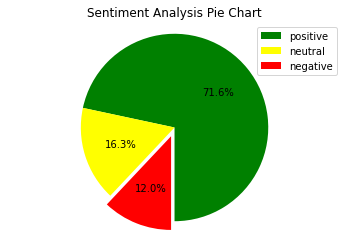

In [ ]:
explode = (0,0,0.1)
labels = 'positive','neutral','negative'
sizes = [pos,neu,neg]
colors = ['green','yellow','red']

plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=-90)
plt.legend(labels)
plt.title("Sentiment Analysis Pie Chart")
plt.axis('equal')

### Tokenization

In [ ]:
for line in positive:
    print(line)

impeccable quality standard
good product
touch great phone response time superb due underlying
awesome
battery issue normally heat charging function goood using 6 month run fastly phone
best gift oldie
overall good price range
amazon happy customer like
good phone
world best apple product
ok
fantastic device feel
awesome phone
happy bought
faulty phone many defect
super price fast delivery
best iphone ever
smooth deal
awesome product
satisfied
good product
build quality good price paid
great service amazon one day delivery
superb phone
quiet good product
good phone dont know wy camera working
great price delivery commitement
purchased mom happy using
awesome mobile
first iphone
iphone getting hot bettery drain fast
good normal use
genuine apple product
fair price always ideal product
gifted girl
updated compare ipad good friend time
phone working fine going bit hang respond bit
nice phone
thats great product recieve amazon
best mobile
always pleasant pride hold
itz showing good perform

In [ ]:
for line in positive:
    for token in line.split():
        print(token)

impeccable
quality
standard
good
product
touch
great
phone
response
time
superb
due
underlying
awesome
battery
issue
normally
heat
charging
function
goood
using
6
month
run
fastly
phone
best
gift
oldie
overall
good
price
range
amazon
happy
customer
like
good
phone
world
best
apple
product
ok
fantastic
device
feel
awesome
phone
happy
bought
faulty
phone
many
defect
super
price
fast
delivery
best
iphone
ever
smooth
deal
awesome
product
satisfied
good
product
build
quality
good
price
paid
great
service
amazon
one
day
delivery
superb
phone
quiet
good
product
good
phone
dont
know
wy
camera
working
great
price
delivery
commitement
purchased
mom
happy
using
awesome
mobile
first
iphone
iphone
getting
hot
bettery
drain
fast
good
normal
use
genuine
apple
product
fair
price
always
ideal
product
gifted
girl
updated
compare
ipad
good
friend
time
phone
working
fine
going
bit
hang
respond
bit
nice
phone
thats
great
product
recieve
amazon
best
mobile
always
pleasant
pride
hold
itz
showing
good
perform

In [ ]:
positive_token = [token for line in positive for token in line.split()]

In [ ]:
negative_token = [token for line in negative for token in line.split()]

In [ ]:
neutral_token = [token for line in neutral for token in line.split()]

### Get most common keywords

In [ ]:
from collections import Counter

In [ ]:
def get_tokens(doc,num=30):
    word_tokens = Counter(doc)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
# Creating most common words variables
most_common_pos_words = get_tokens(positive_token)
most_common_neg_words = get_tokens(negative_token)
most_common_neu_words = get_tokens(neutral_token)

In [ ]:
most_common_neg_words

{'phone': 1043,
 'iphone': 1025,
 '4': 711,
 'apple': 645,
 'battery': 314,
 'like': 293,
 'one': 273,
 'product': 270,
 'buy': 248,
 '2012': 241,
 'bad': 231,
 '5': 225,
 'get': 218,
 'time': 217,
 'use': 195,
 'problem': 184,
 'android': 184,
 'u': 176,
 'anonymous': 176,
 'io': 175,
 'new': 171,
 'year': 162,
 'even': 161,
 'go': 151,
 'using': 143,
 'still': 143,
 'hate': 142,
 '1': 142,
 'screen': 141,
 'slow': 139}

In [ ]:
most_common_neu_words

{'iphone': 989,
 '4': 828,
 'phone': 604,
 'apple': 396,
 '2012': 227,
 'io': 222,
 'buy': 185,
 '5': 181,
 '1': 171,
 'one': 163,
 'like': 149,
 'use': 145,
 'problem': 135,
 'anonymous': 133,
 'battery': 132,
 '2': 128,
 'please': 127,
 'u': 124,
 'help': 121,
 'get': 118,
 'product': 115,
 '3': 109,
 'go': 103,
 'know': 103,
 'tell': 102,
 'working': 101,
 'need': 101,
 'time': 94,
 'want': 92,
 'got': 92}

In [ ]:
most_common_pos_words

{'phone': 8557,
 'iphone': 7120,
 '4': 4851,
 'apple': 3396,
 'good': 2760,
 'love': 2314,
 'great': 2027,
 'one': 1863,
 'product': 1748,
 'like': 1650,
 'use': 1616,
 'best': 1463,
 'battery': 1378,
 '5': 1344,
 'time': 1267,
 'new': 1266,
 'year': 1237,
 'get': 1231,
 'io': 1224,
 'better': 1219,
 'android': 1200,
 'still': 1136,
 'buy': 1124,
 'much': 982,
 'really': 981,
 'work': 952,
 'camera': 937,
 'apps': 928,
 'would': 920,
 'first': 904}

In [ ]:
# most common words plot with seaborn
neg_words = pd.DataFrame(most_common_neg_words.items(),columns=['words','score'])
neu_words = pd.DataFrame(most_common_neu_words.items(),columns=['words','score'])
pos_words = pd.DataFrame(most_common_pos_words.items(),columns=['words','score'])

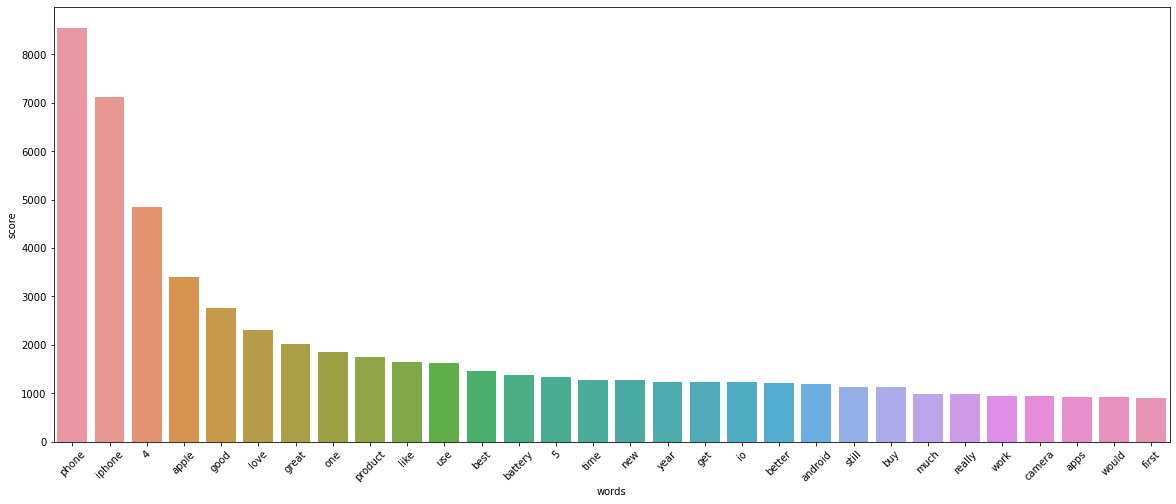

In [ ]:
# Barplot for positive word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=pos_words)
plt.xticks(rotation=45)
plt.show()

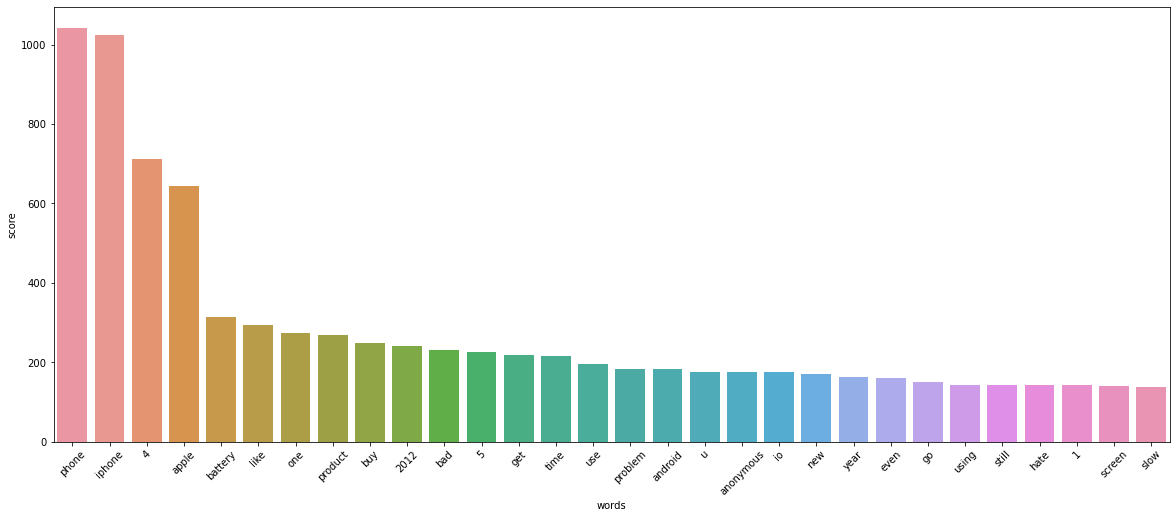

In [ ]:
# Barplot for negative word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=neg_words)
plt.xticks(rotation=45)
plt.show()

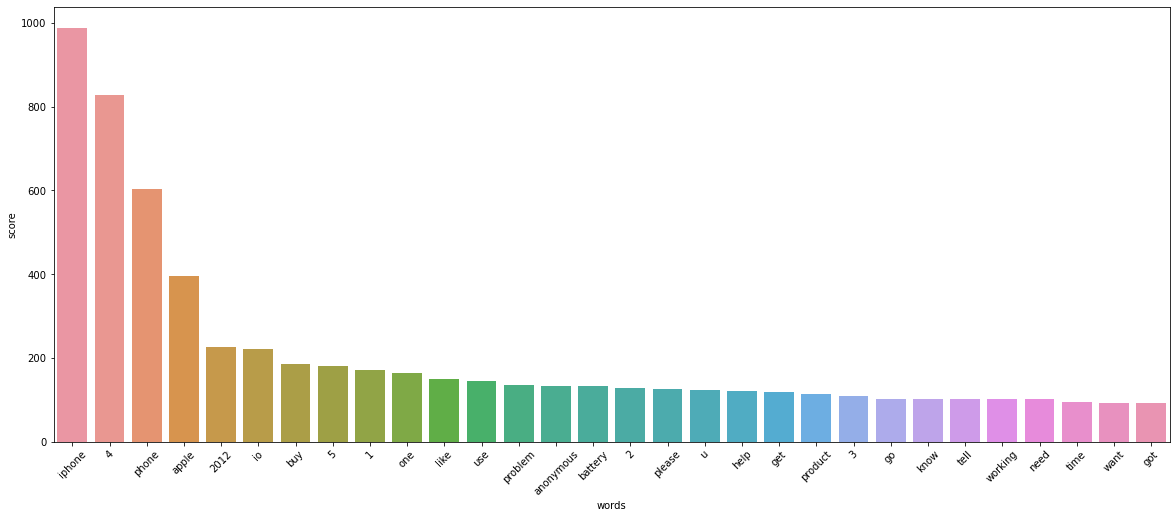

In [ ]:
# Barplot for neutral word
plt.figure(figsize=(20,8))
sns.barplot(x='words',y='score',data=neu_words)
plt.xticks(rotation=45)
plt.show()

### Wordcloud

In [ ]:
from wordcloud import WordCloud

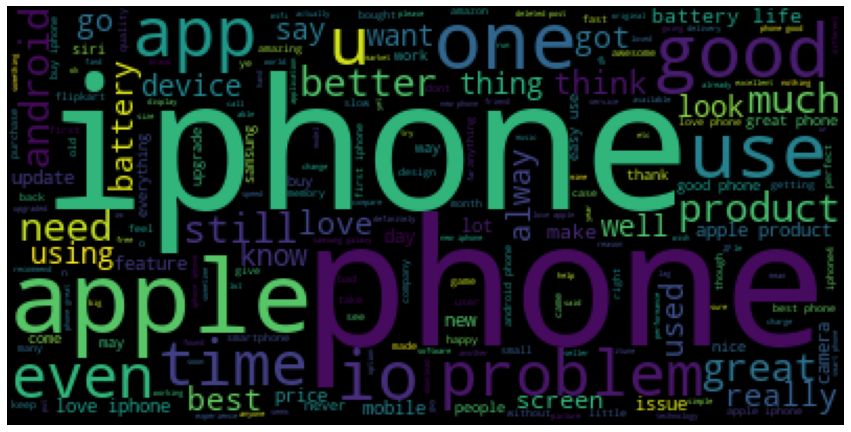

In [ ]:
# Visualize the freqent words
all_words = " ".join([sentence for sentence in data['Lammatized']])

wordcloud = WordCloud().generate(all_words)

# Plot the graph

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Define a function for plotting wordcloud
def plot_wordcloud(doc):
    plt.figure(figsize=(15,8))
    mywordcloud = WordCloud().generate(doc)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Wordcloud for Positive words

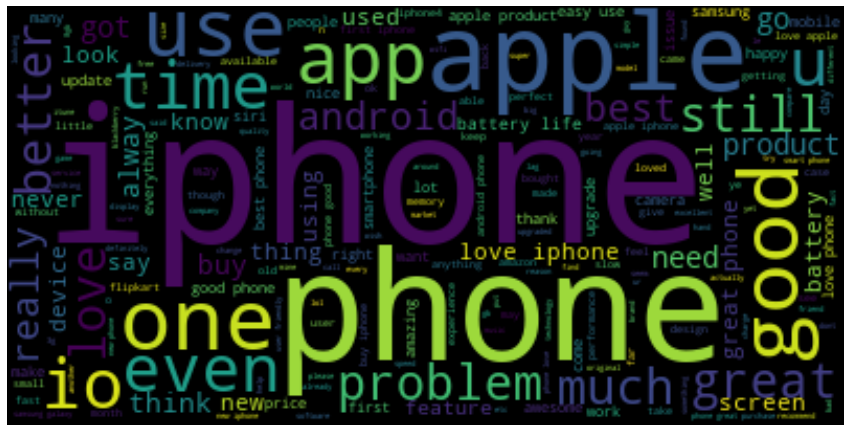

In [ ]:
pos_doc = " ".join(positive_token)
plot_wordcloud(pos_doc)

### Wordcloud for Negative words

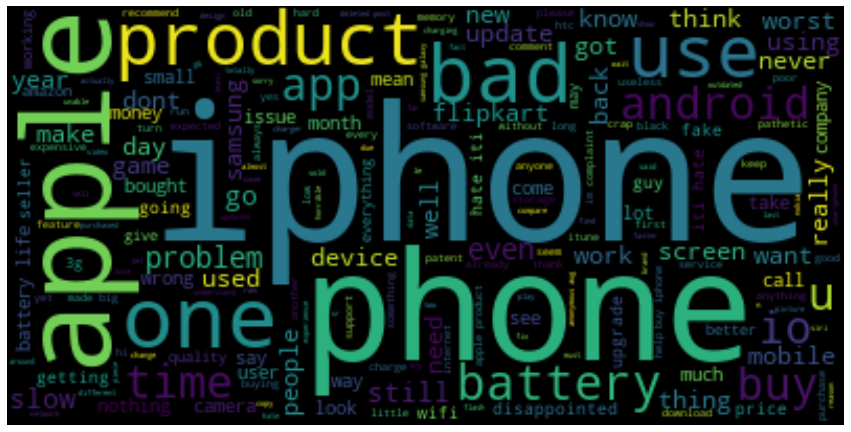

In [ ]:
neg_doc = " ".join(negative_token)
plot_wordcloud(neg_doc)

### Wordcloud for Neutral words

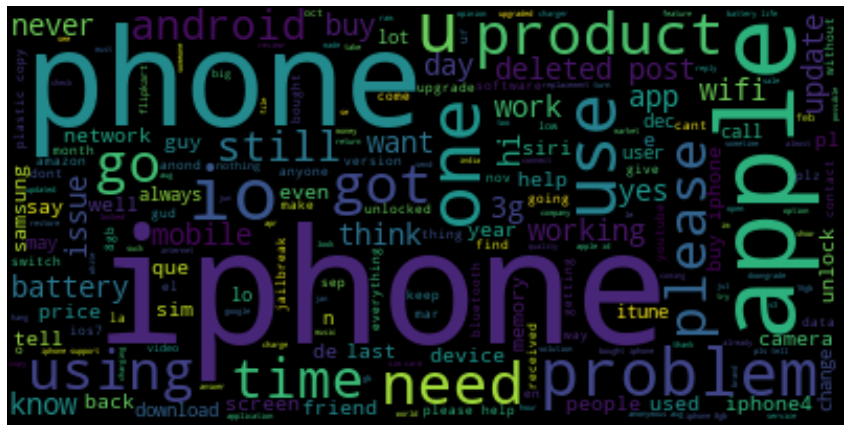

In [ ]:
neu_doc = " ".join(neutral_token)
plot_wordcloud(neu_doc)

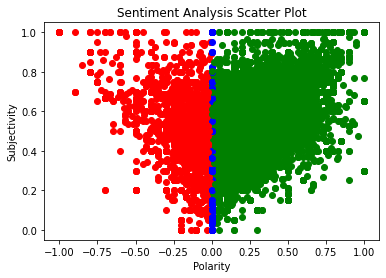

In [ ]:
for index, row in data.iterrows():
    if row['sentiment'] == 'Positive':
        plt.scatter(row['polarity'],row['subjectivity'],color='green')
    elif row['sentiment'] == 'Neutral':
        plt.scatter(row['polarity'],row['subjectivity'],color='blue')
    elif row['sentiment'] == 'Negative':
        plt.scatter(row['polarity'],row['subjectivity'],color='red')
        
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
data.head(1)

Reviews  word_counts  char_counts  stopword_count  \
0  Impeccable quality standards            3           28               0   

                      Lowercase                   Punctuation  \
0  impeccable quality standards  impeccable quality standards   

                      Stopwords                   Lammatized  \
0  impeccable quality standards  impeccable quality standard   

                                                      Sentiment_Result  \
0  {'polarity': 0.375, 'subjectivity': 0.375, 'sentiment': 'Positive'}   

   polarity  subjectivity sentiment  
0     0.375         0.375  Positive

In [ ]:
final_data = data.drop(columns=['word_counts','char_counts','stopword_count','Lowercase','Punctuation','Stopwords',
                  'Sentiment_Result','subjectivity'],axis=1)

# Creating the csv file (Final_data.csv) 

In [ ]:
final_data.to_csv(r'd:\Final_data.csv',index=False)